<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass-Lab  <br>(Day 1)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the dataset (Earthquake data)
The data records the earthquakes experienced for the last few years in the USA. There are four parameters in the data, where each data point represents an earthquake.

**Latitude**: Latitude of the place (above the equator)

**Longitude**: Longitude of the place (west of the prime meridian)

**DepthMeters**: Absolute height of the place

**Magnitude**: Magnitude of the earthquake wave

## Table of Content

1. **[Exploratory Data Analysis](#eda)**
2. **[K-means Clustering](#k-means)**
3. **[Interpret the Clusters](#inter)**

#### Import the required libraries

In [1]:
# write your code here
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Load the csv file and print the first five observations.

In [2]:
# write your code here
df=pd.read_csv('Earthquake_Data.csv')
df.head()

,Latitude,Longitude,DepthMeters,Magnitude
0,39.644,-75.483,5000,2.8
1,37.379,-80.746,11500,2.8
2,45.296,-73.475,18000,2.1
3,42.825,-78.239,5000,2.4
4,38.619,-80.909,100,3.4


### Let's begin with some hands-on practice exercises

<a id="eda"> </a>
## 1. Exploratory Data Analysis

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Find the number of variables and the number of observations in the data.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [3]:
# write your code here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1647 entries, 0 to 1646
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Latitude     1647 non-null   float64
 1   Longitude    1647 non-null   float64
 2   DepthMeters  1647 non-null   int64  
 3   Magnitude    1647 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 51.6 KB


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Check the datatype of each variable in the data.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [4]:
# write your code here
df.dtypes

Latitude       float64
Longitude      float64
DepthMeters      int64
Magnitude      float64
dtype: object

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Find if there are missing values in the data.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [5]:
# write your code here
df.isnull().sum()

Latitude       0
Longitude      0
DepthMeters    0
Magnitude      0
dtype: int64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Obtain the summary statistic of data.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [6]:
# write your code here
df.describe()

,Latitude,Longitude,DepthMeters,Magnitude
count,1647.000000,1647.000000,1647.000000,1647.000000
mean,39.903436,-79.008111,7559.720704,2.384827
std,2.410973,3.192442,5205.963953,0.459781
min,37.007700,-82.881000,100.000000,0.200000
25%,37.902400,-81.694150,3450.000000,2.100000
50%,38.477800,-80.831400,6400.000000,2.400000
75%,41.467200,-75.934050,11500.000000,2.600000
max,45.300900,-73.063400,32300.000000,5.200000


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Visualize the outliers in the dataset using boxplot.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

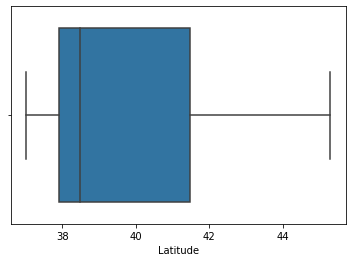

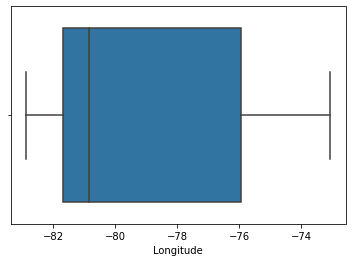

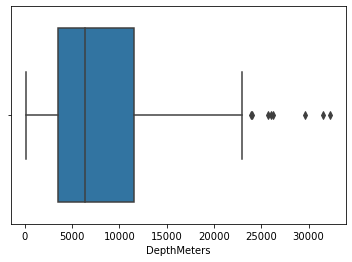

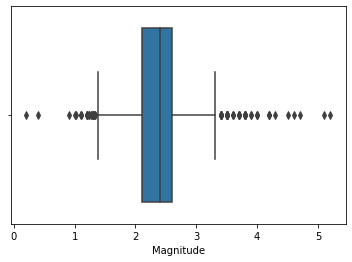

In [7]:
for col in df.columns:
    sns.boxplot(x=col,data=df)
    plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Remove the outliers using the IQR method and check the shape of data.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [8]:
q1=df.quantile(0.25)
q3=df.quantile(0.75)
iqr=q3-q1
dfc=df[~((df<(q1-1.5*iqr))|(df>(q3+1.5*iqr))).any(axis=1)]


In [9]:
dfc.shape

(1562, 4)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Drop the variables representing the geographical coordinates of the earthquake.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [10]:
# write your code here
dfc=dfc.drop(['Latitude','Longitude'],axis=1)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Transform the variables such that it will have mean 0 and standard deviation 1 and print the summary statistics.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [11]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
dfcs=ss.fit_transform(dfc)
dfcs=pd.DataFrame(dfcs,columns=dfc.columns)
dfcs.describe()

,DepthMeters,Magnitude
count,1.562000e+03,1.562000e+03
mean,5.117545e-18,5.544718e-16
std,1.000320e+00,1.000320e+00
min,-1.463207e+00,-2.750825e+00
25%,-8.070463e-01,-7.350195e-01
50%,-2.105364e-01,1.167292e-01
75%,8.035303e-01,6.845617e-01
max,3.090151e+00,2.671975e+00


<a id="k-means"> </a>
## 2. K-means Clustering

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Find within cluster sum of squares for the number of clusters from 1 to 7.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [12]:
from sklearn.cluster import KMeans


In [13]:
wcss=[]
for k in range(1,8):
    kmeans=KMeans(n_clusters=k,random_state=42)
    kmeans.fit(dfcs)
    wcss.append(kmeans.inertia_)
    
    
wcss

C:\Anacondapython\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


[3123.999999999996,
 1943.5822119519103,
 1257.9770800049287,
 969.39895936966,
 791.1137396480923,
 672.9895484472006,
 589.4187248204402]

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Visualize the elbow plot to get the optimal value of K.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

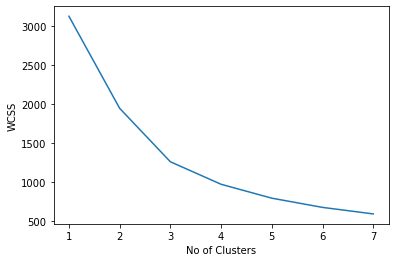

In [14]:
plt.plot(range(1,8),wcss)
plt.xlabel('No of Clusters')
plt.ylabel('WCSS')
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. Find the silhouette coefficient for the number of clusters from 2 to 7.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [15]:
from sklearn.metrics import silhouette_score

In [16]:
sscore=[]
for k in range(2,8):
    kmeans=KMeans(n_clusters=k,random_state=42)
    kmeans.fit(dfcs)
    score=silhouette_score(dfcs,kmeans.labels_)
    sscore.append(score)
    
sscore

[0.3743704735416301,
 0.3926800390337725,
 0.36263727740444174,
 0.34414533514273477,
 0.3456365472328617,
 0.34751266276631804]

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Plot of silhouette coefficients using appropriate graphical method.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

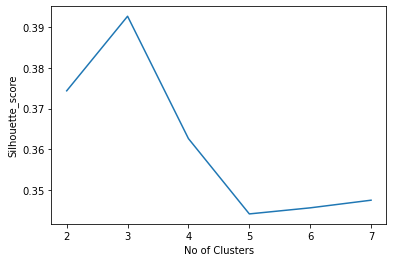

In [17]:
plt.plot(range(2,8),sscore)
plt.xlabel('No of Clusters')
plt.ylabel('Silhouette_score')
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Visualize the silhouette scores using silhouette plot and obtain the clusters for K from 2 to 6.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

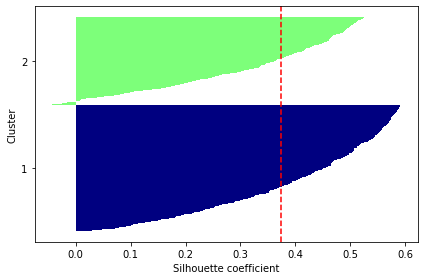

In [18]:
import plusmodules as pm
pm.svisualizer(dfcs,2)

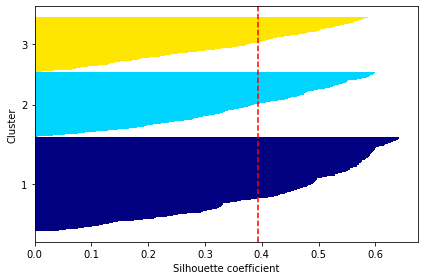

In [19]:
pm.svisualizer(dfcs,3)

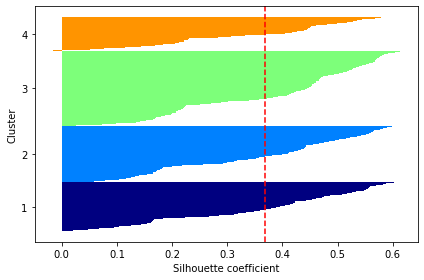

In [20]:
pm.svisualizer(dfcs,4)

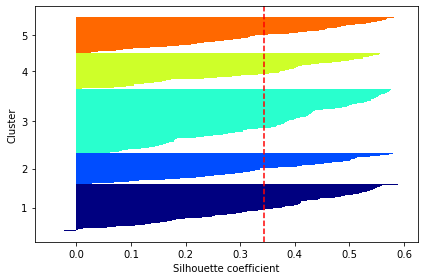

In [21]:
pm.svisualizer(dfcs,5)

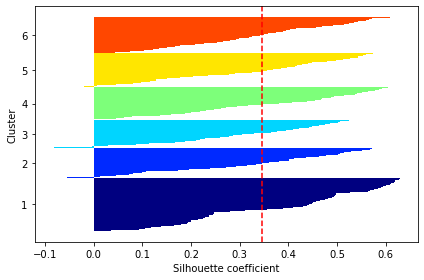

In [22]:
pm.svisualizer(dfcs,6)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Fit K means clustering algorithm with an optimal number of clusters.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [23]:
kmeans=KMeans(n_clusters=3,random_state=42)
kmeans.fit(dfcs)

KMeans(n_clusters=3, random_state=42)

<a id="inter"> </a>
## 3. Interpret the Clusters

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Consider the groups formed in the previous question and display the size of each cluster.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [24]:
lbl=pd.DataFrame(kmeans.labels_,columns=['cluster'])
lbl['cluster'].value_counts()

2    685
1    477
0    400
Name: cluster, dtype: int64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. Plot the number of observations in each cluster.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<AxesSubplot:>

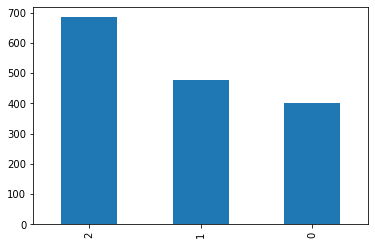

In [25]:
lbl['cluster'].value_counts().plot(kind='bar')

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. Obtain the centroids of the clusters formed using K-means clustering.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [26]:
cent=kmeans.cluster_centers_
cent

array([[-0.16849241, -1.21277955],
       [ 1.17474623,  0.16696511],
       [-0.71964524,  0.59192623]])

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Obtain the observations belonging to the 1st cluster and get the summary of the cluster.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [27]:
dfc['cluster']=kmeans.labels_
dfc.head()

,DepthMeters,Magnitude,cluster
0,5000,2.8,2
1,11500,2.8,1
2,18000,2.1,1
3,5000,2.4,2
5,2300,2.4,2


In [28]:
dfc0=dfc[dfc['cluster']==0]

In [29]:
dfc0.describe()

,DepthMeters,Magnitude,cluster
count,400.000000,400.000000,400.0
mean,6611.450000,1.931725,0.0
std,3683.651261,0.211741,0.0
min,100.000000,1.390000,0.0
25%,4200.000000,1.800000,0.0
50%,6000.000000,2.000000,0.0
75%,8772.500000,2.100000,0.0
max,18600.000000,2.230000,0.0


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Obtain the observations belonging to the 2nd cluster and get the summary of the cluster.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [30]:
dfc0=dfc[dfc['cluster']==1]
dfc0.describe()

,DepthMeters,Magnitude,cluster
count,477.000000,477.000000,477.0
mean,13366.939203,2.417694,1.0
std,2846.765942,0.272955,0.0
min,8300.000000,1.600000,1.0
25%,11300.000000,2.200000,1.0
50%,13100.000000,2.400000,1.0
75%,14900.000000,2.600000,1.0
max,23000.000000,3.300000,1.0


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Obtain the observations belonging to the 3rd cluster and get the summary of the cluster.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [31]:
dfc0=dfc[dfc['cluster']==2]
dfc0.describe()

,DepthMeters,Magnitude,cluster
count,685.000000,685.000000,685.0
mean,3839.562044,2.567372,2.0
std,2515.001619,0.229455,0.0
min,100.000000,2.200000,2.0
25%,1500.000000,2.400000,2.0
50%,3700.000000,2.500000,2.0
75%,5600.000000,2.700000,2.0
max,10000.000000,3.300000,2.0
